# k-means e hierarchical clustering

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
import warnings

# Configuramos para ignorar los warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Ruta al archivo CSV descomprimido
data_path = r"D:\CONTRATOS 2024\LEANDRO DOCUMENTOS\LEANDRO DOCUMENTOS\UNIVERSIDAD\SEXTO SEMESTRE\ANALISIS DE DATOS\TAREA 4\Mall_Customers.csv"

# Cargar los datos en un DataFrame
df = pd.read_csv(data_path)

# Mostrar las primeras filas del DataFrame para verificar la carga correcta
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Ver las estadísticas descriptivas de los datos
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [4]:
# Verificar si hay valores faltantes
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


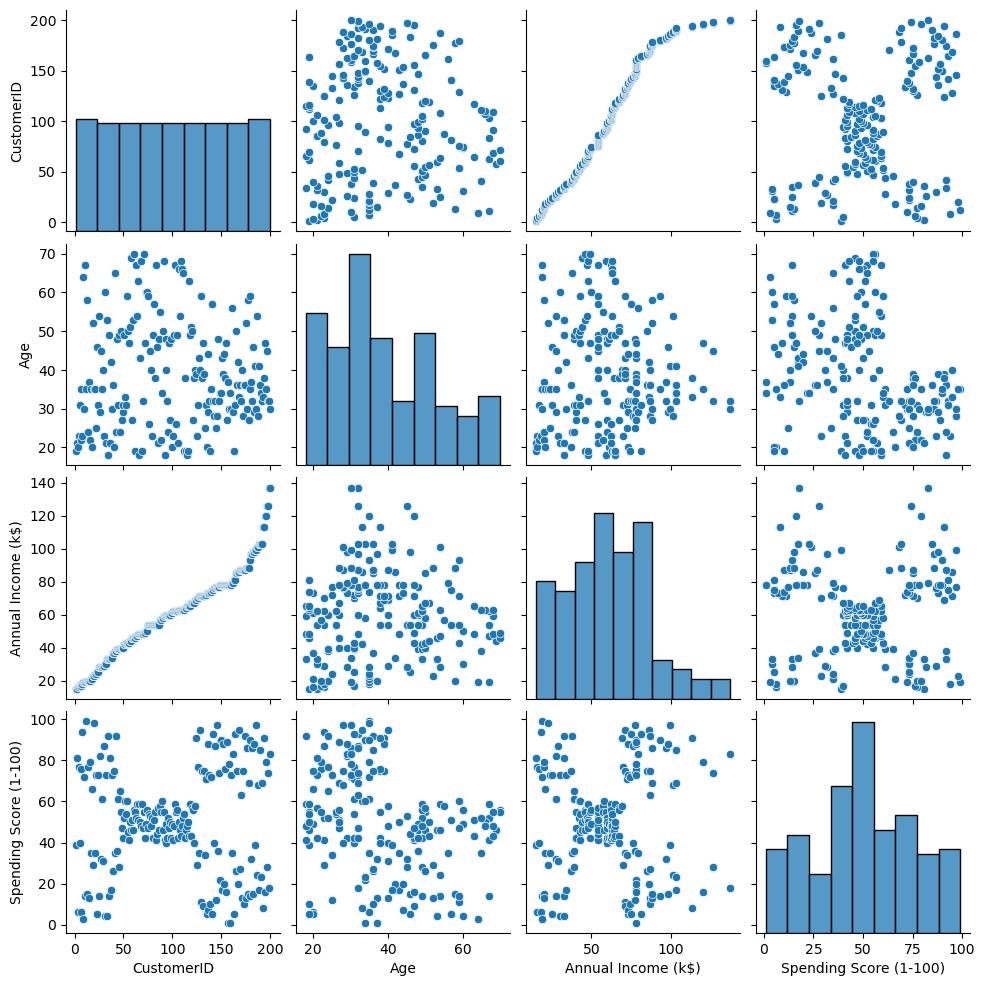

In [6]:
# Visualización básica de las distribuciones de las características
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [ ]:
#Histogramas en la diagonal: Cada histograma representa la distribución de una variable. Las variables incluidas aquí son CustomerID, Edad, Ingreso Anual (k$) y Puntuación de Gasto (1-100). Estos histogramas muestran la frecuencia de cada valor dentro de la variable correspondiente.
#Gráficos de dispersión en los cuadros fuera de la diagonal: Estos muestran la relación entre pares de variables. Por ejemplo, el gráfico que cruza Age con Annual Income (k$) muestra puntos dispersos que no indican una relación clara, mientras que el gráfico que cruza Annual Income (k$) con Spending Score (1-100) muestra una distribución de puntos que sugiere la falta de una relación lineal clara.


In [7]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las columnas numéricas que queremos estandarizar
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Estandarización de las características
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Verificar las primeras filas para confirmar la transformación
print(df_scaled.head())

   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male -1.424569           -1.738999               -0.434801
1           2    Male -1.281035           -1.738999                1.195704
2           3  Female -1.352802           -1.700830               -1.715913
3           4  Female -1.137502           -1.700830                1.040418
4           5  Female -0.563369           -1.662660               -0.395980


In [8]:
df_scaled = pd.get_dummies(df_scaled, columns=['Gender'])

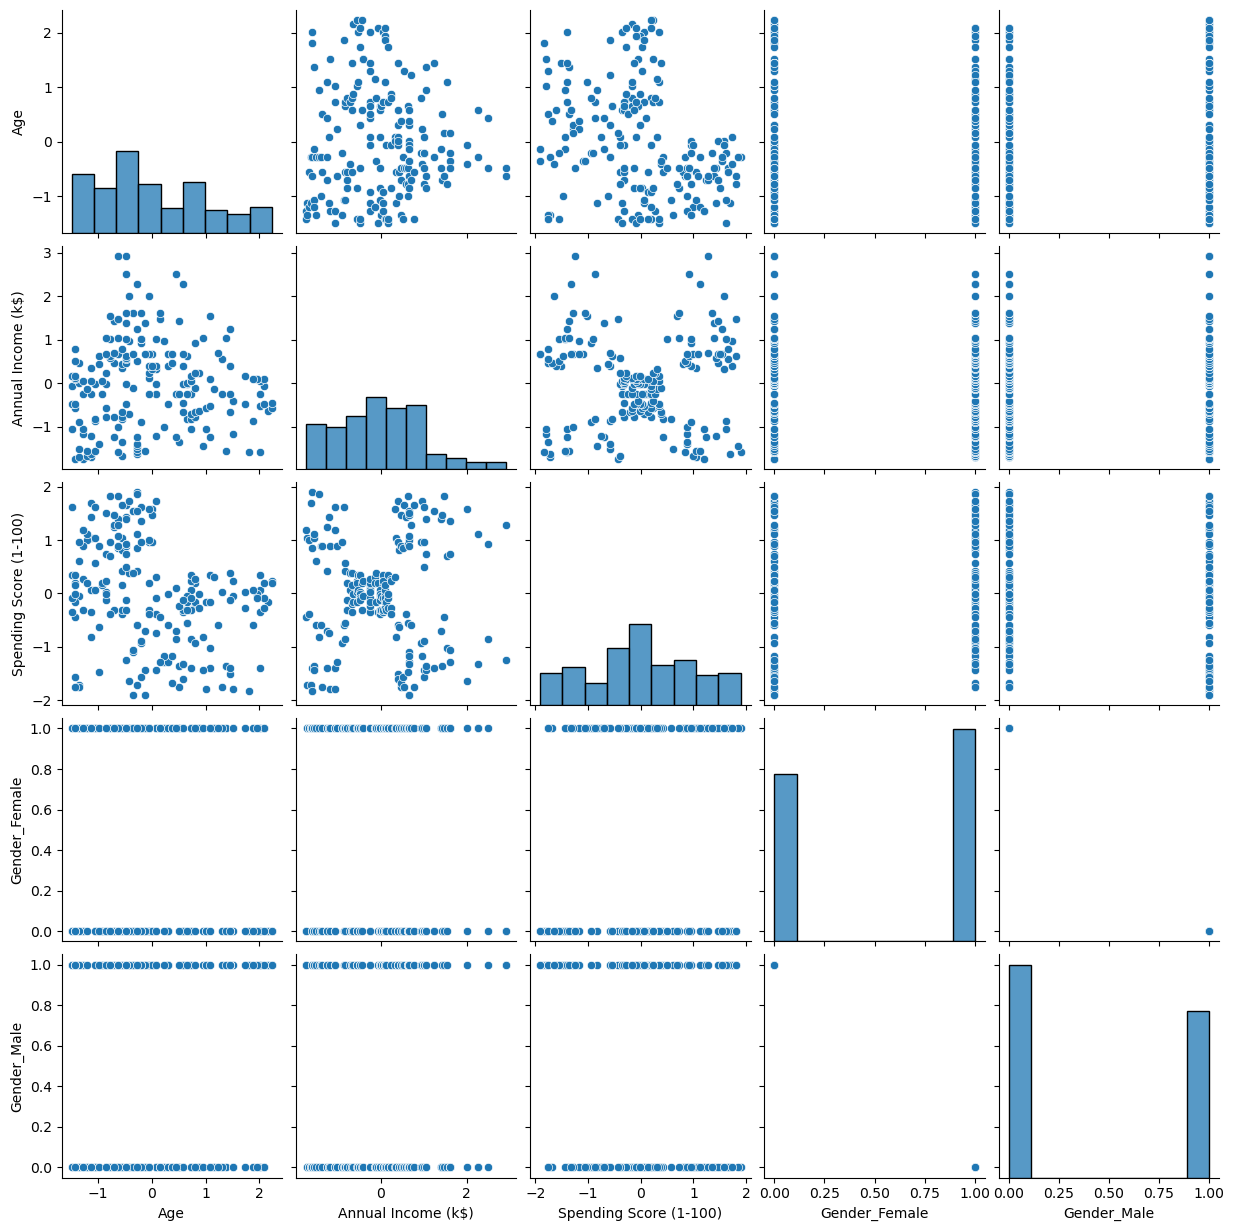

In [9]:
# Visualización de las características estandarizadas
sns.pairplot(df_scaled.drop('CustomerID', axis=1))  # Sin incluir el ID del cliente
plt.show()

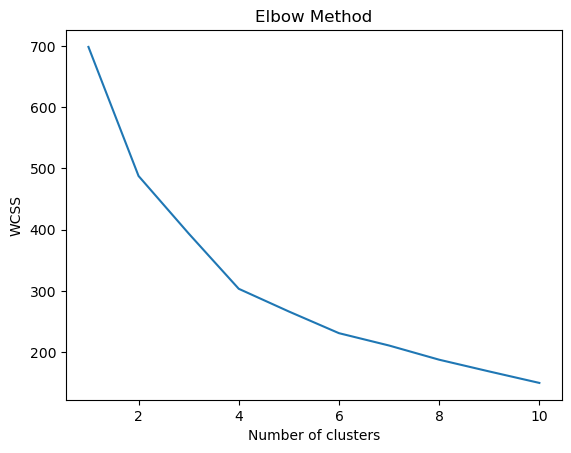

In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):  # Prueba de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled.drop('CustomerID', axis=1))  # Excluir ID del cliente
    wcss.append(kmeans.inertia_)

# Gráfico del método del codo
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Suma de cuadrados dentro del cluster
plt.show()

In [ ]:

#diagrama de codo 
#1. Eje X – Número de Clusters: Representa diferentes números de clusters desde 1 hasta 10. Es el rango dentro del cual estás evaluando cuál es el número óptimo de clusters para tu conjunto de datos.

#2. Eje Y – WCSS (Within-Cluster Sum of Squares)**: Este valor representa la suma de los cuadrados dentro del cluster. En términos simples, es una medida de cuán compactos son los clusters. Cuanto menor sea el WCSS, más cercanos están los puntos dentro de un cluster.

#3. Tendencia del Gráfico: La línea en el gráfico muestra una disminución rápida en el WCSS a medida que aumenta el número de clusters, pero esta disminución se vuelve más gradual después de cierto punto. Este cambio en la tasa de disminución es crucial para elegir el número óptimo de clusters.

#4. Identificación del Codo: El "codo" es el punto en el gráfico donde la disminución en el WCSS pasa de ser rápida a ser gradual. En tu gráfico, este cambio parece ser más pronunciado en el cluster número 5. Esto sugiere que aumentar el número de clusters más allá de 5 no resulta en una mejora significativa en la compactación de los clusters, lo que implica que 5 podría ser el número óptimo de clusters para tu análisis.

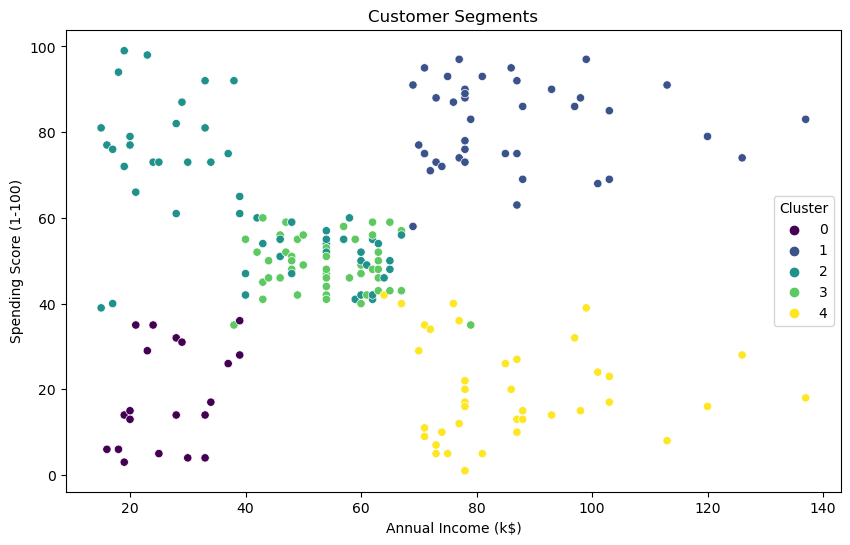

In [11]:
# Configurar y entrenar el modelo K-means
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_scaled.drop('CustomerID', axis=1))

# se Añadieron las etiquetas de cluster al DataFrame original para análisis
df['Cluster'] = clusters

# Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('Customer Segments')
plt.show()

In [ ]:
#Annual Income (k$)' y 'Spending Score (1-100)
#1. Cluster 0 (color azul): Este grupo consiste en clientes con ingresos anuales altos pero con puntuaciones de gasto bajas. Pueden ser vistos como clientes "ahorrativos".

#2. Cluster 1 (color verde): Representa a los clientes con ingresos medios y puntuaciones de gasto medias. Este es el grupo de clientes "promedio".

#3. Cluster 2 (color morado): Este cluster incluye a clientes con ingresos bajos y puntuaciones de gasto bajas. Son los clientes más "conservadores" en términos de gasto.

#4. Cluster 3 (color rojo): Comprende clientes con ingresos bajos a medios y altas puntuaciones de gasto. Estos podrían ser considerados como clientes "derrochadores" o "impulsivos".

#5. Cluster 4 (color amarillo): Este grupo tiene clientes con ingresos altos y altas puntuaciones de gasto, identificándolos como los "clientes premium" que generan más ingresos para el negocio.
# Se puede concluir:
#este análisis ofrece una comprensión valiosa de la diversidad de comportamientos de los clientes en relación con sus ingresos y gastos, facilitando decisiones informadas en varias áreas operativas y estratégicas del negocio

In [16]:
# Agrupamos por 'Cluster' y calculamos estadísticas descriptivas para columnas numéricas
grouped = df.groupby('Cluster')
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Asegúrate de excluir ID si es numérico

# Mostrar la media de las columnas numéricas
print(grouped[numeric_cols].mean())

# Contar el tamaño de cada cluster
print(grouped.size())

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         24.100000  46.250000           26.750000               18.350000   
1        161.025000  32.875000           86.100000               81.525000   
2         55.648148  25.185185           41.092593               62.240741   
3         83.872340  55.638298           54.382979               48.851064   
4        159.743590  39.871795           86.102564               19.358974   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  
Cluster
0    20
1    40
2    54
3    47
4    39
dtype: int64


In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Coeficiente de Silhouette
silhouette_avg = silhouette_score(df_scaled.drop('CustomerID', axis=1), df['Cluster'])
print("The average silhouette_score is :", silhouette_avg)

# Índice de Calinski-Harabasz
calinski_harabaz_score = calinski_harabasz_score(df_scaled.drop('CustomerID', axis=1), df['Cluster'])
print("The Calinski-Harabasz score is:", calinski_harabaz_score)

The average silhouette_score is : 0.320227890907277
The Calinski-Harabasz score is: 79.18535642971933


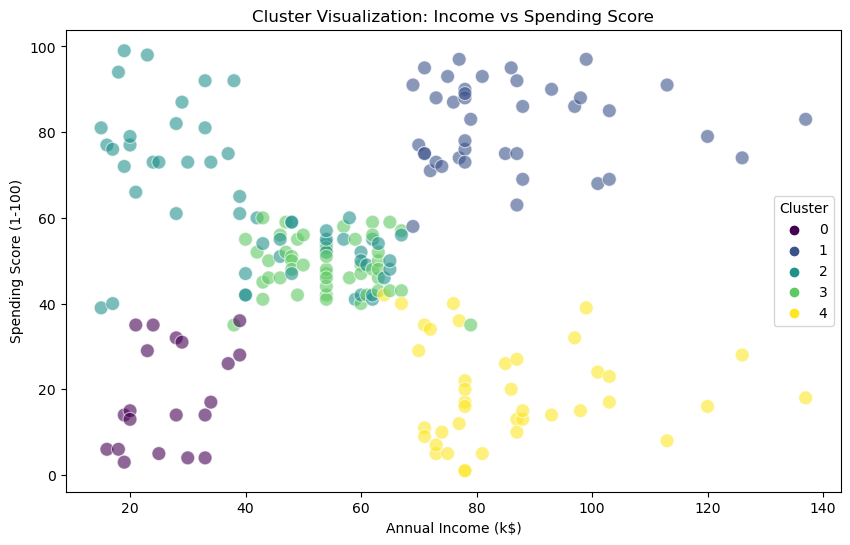

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.6, legend='full')
plt.title('Cluster Visualization: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
### explicación:
#Densidad y Distribución: Los clusters varían en densidad y distribución espacial. Por ejemplo, el Cluster 0 está más disperso, lo que indica variabilidad en el gasto a pesar de tener ingresos similares. Por otro lado, el Cluster 4 está más concentrado, sugiriendo mayor uniformidad en el comportamiento de gasto.
 
# Estrategias que se pueden tomar basadas en el comportamiento: Cada cluster puede ser abordado con estrategias de marketing y de servicio al cliente diferenciadas. un  ejemplo de esto, los incentivos de gasto podrían ser efectivos para el Cluster 0 para aumentar su participación, mientras que ofertas exclusivas y productos premium podrían ser más adecuados para el Cluster 4.

# Seguimiento y Evaluación: Es importante monitorizar la evolución de estos clusters con el tiempo para adaptar las estrategias a cambios en el comportamiento de los clientes y las condiciones del mercado.

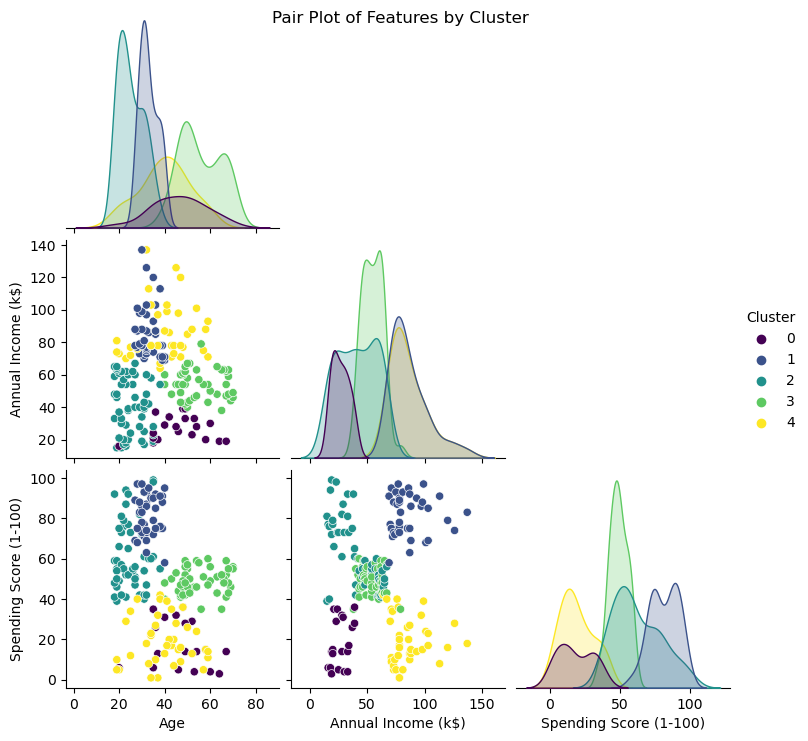

In [19]:
# Utilizando seaborn para crear un pair plot
sns.pairplot(df.drop('CustomerID', axis=1), hue='Cluster', palette='viridis', corner=True)  # 'corner=True' para mostrar solo la mitad de los gráficos para evitar repetición
plt.suptitle('Pair Plot of Features by Cluster', verticalalignment='top')
plt.show()

In [ ]:
#Esta gráfica es un "pair plot" o gráfico de pares realizado con la librería Seaborn en Python, que muestra las relaciones entre tres variables ('Age', 'Annual Income (k$)', y 'Spending Score (1-100)') y cómo se distribuyen en función de los 5 clusters identificados.
# Gráficos de Dispersión
#1. Edad vs Ingreso Anual:
 #La distribución sugiere que no hay una correlación clara entre la edad y el ingreso anual en ningún cluster específico. Los puntos están bastante dispersos, lo que indica que la edad no es un factor determinante del ingreso anual en este dataset.

#2. Edad vs Puntuación de Gasto:
 # Similar al primer gráfico, los puntos están dispersos, mostrando que no hay una relación directa entre la edad y la puntuación de gasto. Sin embargo, parece que los clusters con bajos ingresos y puntuaciones de gasto (clusters morado y rojo) tienen una distribución más amplia de edades.

#3. Ingreso Anual vs Puntuación de Gasto:
# Esta relación es más reveladora. Los clusters están más definidos según el ingreso y la puntuación de gasto. Por ejemplo, el cluster amarillo (ingresos altos y gasto alto) y el cluster azul (ingresos altos y gasto bajo) muestran cómo los clientes con ingresos similares pueden tener comportamientos de gasto muy diferentes.

# Gráficos de Densidad (Diagonales)
# Estos gráficos muestran la distribución de cada variable para cada cluster:
# Edad: Todos los clusters tienen distribuciones de edad similares, con una ligera inclinación hacia edades más jóvenes en algunos clusters. No hay una diferencia marcada entre los grupos.
# Ingreso Anual: Hay diferencias claras en las distribuciones de ingreso. Los clusters están claramente separados por niveles de ingreso, lo que sugiere que el ingreso es un buen discriminador para la segmentación.
# Puntuación de Gasto: Similar al ingreso, las puntuaciones de gasto también discriminan bien entre los grupos, con cada cluster mostrando una distribución distinta.

#interpretacion
# Segmentación de Mercado: realizando este análisis ayuda a entender cómo se pueden segmentar los clientes no solo por un factor (como el ingreso), sino también por cómo se relacionan múltiples factores.